# Знакомство с DEAP

DEAP - Distributed Evolutionary Algorithms in Python (распределенные эволюционные алгоритмы на Python).

In [1]:
from deap import base, algorithms
from deap import creator
from deap import tools

Функция `creator.create(<название класса>, <базовый класс>, [атрибуты нового класса])` позволяет создавать новые объекты класса. Пример:

In [2]:
creator.create('Point', object, max_coord =10, min_coord=0, coords=list)

Неизменяемые свойства становятся атрибутами класса, а изменяемые - свойствами его экземпляров:

    class Point(object):
        max_coord = 10
        min_coord = 0
        
        def __init__(self):
            self.coords = list()

    def sum_two(a, b):
        return a + b
        
    toolbow = base.Toolbox()
    
    toolbox.register('sum_alias', sum_two) по сути создается псевдоним функции
    
    res = toolbox.sum_alias(5, 2)
    
    или
    
    toolbox.register('sum_2', sum_two, b = 2) 
    
    res = toolbox.sum_2(5) 

# Решение задачи oneMax

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [4]:
ONE_MAX_LENGTH = 100 # длинна хромосомы
POPULATION_SIZE = 200 # число индивидуумов в популяции
P_CROSSOVER = 0.9 # вероятность кроссинговера (скрещивания особей)
P_MUTATION = 0.1 # вероятность мутации
MAX_GENERATIONS = 50 # максимальное число поколений

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [5]:
creator.create('FitnessMax', base.Fitness, weights=(1.0,))

    values*weights = (values[0]*weights[0], values[1]*weights[1], ...)
    
    values считаются на основе функций и домножается на веса (в данном случае единица)
    
    в условиях когда нужно минимизировать функцию, вес нужно установить как -1, потому что алгоритм максимизирует функцию. С помощью этих весов можно управлять оптимизацией определенных криетериев в задаче

In [6]:
creator.create('Individual', list, fitness=creator.FitnessMax)

In [7]:
def oneMaxFitness(individual): 
    return sum(individual), # кортеж

In [8]:
toolbox = base.Toolbox()

In [9]:
toolbox.register('zeroOrOne', random.randint, 0, 1)

In [10]:
toolbox.register('individualCreator', tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

    tools.initRepeat(<контейнер для хранения генов>, <функция генерации значения гена>, <число генов в хромосоме>)

In [11]:
toolbox.register('populationCreator', tools.initRepeat, list, toolbox.individualCreator)

In [12]:
population = toolbox.populationCreator(n = POPULATION_SIZE)

In [13]:
toolbox.register('evaluate', oneMaxFitness)

In [14]:
toolbox.register('select', tools.selTournament, tournsize = 3)

In [15]:
toolbox.register('mate', tools.cxOnePoint)

In [16]:
toolbox.register('mutate', tools.mutFlipBit, indpb = 1.0 / ONE_MAX_LENGTH)

In [17]:
stats = tools.Statistics(lambda ind: ind.fitness.values)

In [18]:
stats.register('max', np.max)
stats.register('avg', np.mean)

gen	nevals	max	avg   
0  	200   	61 	49.695
1  	193   	65 	53.575
2  	179   	66 	56.855
3  	187   	69 	59.42 
4  	184   	70 	62.03 
5  	188   	75 	64.715
6  	176   	75 	67.515
7  	184   	77 	70.215
8  	180   	81 	72.475
9  	174   	82 	74.79 
10 	172   	85 	76.685
11 	177   	85 	78.46 
12 	178   	87 	80.265
13 	178   	87 	81.8  
14 	184   	87 	83.15 
15 	181   	89 	84.4  
16 	185   	89 	85.59 
17 	174   	90 	86.755
18 	186   	91 	87.715
19 	184   	92 	88.495
20 	178   	92 	89.275
21 	176   	93 	90.04 
22 	185   	94 	90.865
23 	180   	94 	91.645
24 	177   	95 	92.69 
25 	191   	95 	93.325
26 	169   	95 	93.935
27 	184   	96 	94.39 
28 	184   	96 	94.84 
29 	179   	96 	95.07 
30 	183   	97 	95.325
31 	180   	97 	95.69 
32 	189   	97 	95.93 
33 	177   	97 	96.085
34 	188   	98 	96.325
35 	169   	98 	96.835
36 	182   	98 	97.18 
37 	183   	99 	97.655
38 	182   	99 	97.91 
39 	192   	99 	98.04 
40 	173   	100	98.29 
41 	182   	100	98.55 
42 	176   	100	98.915
43 	188   	100	99.195
44 	192   

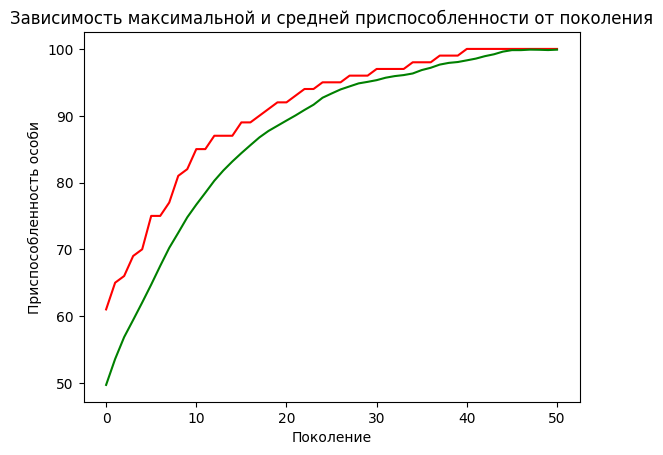

In [19]:
population, logbook = algorithms.eaSimple(population, 
                                          toolbox, 
                                          cxpb=P_CROSSOVER, 
                                          mutpb=P_MUTATION, 
                                          ngen=MAX_GENERATIONS, 
                                          stats=stats,
                                          verbose=True)


maxFitnessValues, meanFitnessValues = logbook.select('max', 'avg')

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Приспособленность особи')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()